2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически). 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
def standardization(x: np.ndarray) -> np.ndarray:
    '''Функция принимает и возвращает одномерный массив'''
    s = (x - x.mean()) / x.std()
    return s

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standardization(X[:, 1])
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 3] = standardization(X[:, 3])

In [6]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [7]:
def eval_model_reg1(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * np.sign(w))
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [8]:
w = eval_model_reg2(X_st, y, iterations=1000, eta=1e-2, lambda_=0.001, verbose=True)

100: weights=[49.81914355  3.29277825  4.1534082   3.82695431], MSE=105.956
200: weights=[56.34692648  3.6230585   4.50003522  3.18139557], MSE=46.634
300: weights=[57.21087318  3.96172325  4.71963255  2.62328769], MSE=45.040
400: weights=[57.32521582  4.3088742   4.85479756  2.13860328], MSE=44.632
500: weights=[57.34034897  4.65799669  4.92984778  1.71039568], MSE=44.316
600: weights=[57.34235183  5.00452731  4.96232406  1.32624324], MSE=44.044
700: weights=[57.34261691  5.3453282   4.9648835   0.97702491], MSE=43.803
800: weights=[57.34265199  5.67828649  4.9466501   0.65601395], MSE=43.585
900: weights=[57.34265663  6.00202473  4.91419228  0.3582217 ], MSE=43.387
1000: weights=[57.34265725  6.31569147  4.87223017  0.0799224 ], MSE=43.206


In [9]:
w = eval_model_reg1(X_st, y, iterations=1000, eta=1e-2, lambda_=0.001, verbose=True)

100: weights=[49.85307781  3.29262574  4.15499018  3.82895914], MSE=105.438
200: weights=[56.39869684  3.62231436  4.50273797  3.18298086], MSE=46.526
300: weights=[57.26677393  3.96113778  4.72359051  2.62349079], MSE=45.021
400: weights=[57.38189793  4.30923324  4.85990642  2.13672579], MSE=44.625
500: weights=[57.39716562  4.6600654   4.93586676  1.70589338], MSE=44.310
600: weights=[57.39919042  5.00903109  4.96895211  1.31867098], MSE=44.036
700: weights=[57.39945894  5.35294267  4.97180473  0.96600263], MSE=43.793
800: weights=[57.39949456  5.68963321  4.95355938  0.64120613], MSE=43.574
900: weights=[57.39949928  6.01767043  4.92080843  0.33932531], MSE=43.374
1000: weights=[5.73994999e+01 6.33614929e+00 4.87830172e+00 5.66600115e-02], MSE=43.191


In [10]:
def regularization(X, y, l_list, reg_func=eval_model_reg2):
    w_list = []
    error_list = []

    for l in l_list:
        w_new = reg_func(X, y, iterations=1000, eta=1e-2, lambda_=l)
        w_list.append(w_new)
        error_list.append(calc_mse(y, np.dot(X, w_new)))
    
    return (np.array(w_list), np.array(error_list))

In [11]:
l_list = np.logspace(start=-4, stop=1, num=20)
weights_r2, errors_r2 = regularization(X_st, y, l_list)
weights_r1, errors_r1 = regularization(X_st, y, l_list, eval_model_reg1)

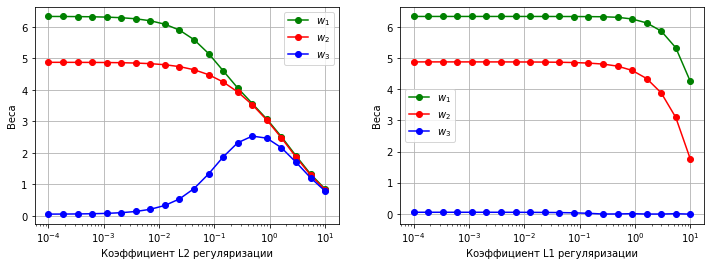

In [12]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.xscale('log')
plt.plot(l_list, weights_r2[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights_r2[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights_r2[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

plt.subplot(1, 2, 2)
plt.xscale('log')
plt.plot(l_list, weights_r1[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights_r1[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights_r1[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L1 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

При L1 регуляризации вес для признака 3 устанавливается в 0 при любом коэффициенте (селекция ненужных признаков)

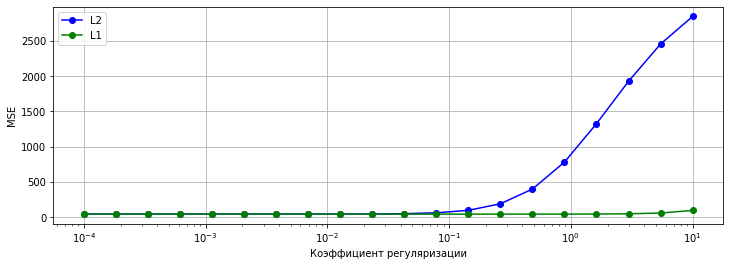

In [23]:
fig = plt.figure(figsize=(12, 4))

plt.xscale('log')
plt.plot(l_list, errors_r2, 'bo-', label='L2')
plt.plot(l_list, errors_r1, 'go-', label='L1')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('MSE')
plt.grid()
plt.legend();